In [ ]:
#| hide
import sys
sys.path.append('..')
from my_autograd.core import *

#| hide

from IPython.display import Image, display
import graphviz

def draw_dag(v):
    # Create a Digraph object with specific graph attributes
    dot = graphviz.Digraph(format='png', engine='dot', graph_attr={'rankdir': 'LR', 'ranksep': '0.4', 'nodesep': '0.4'})

    # Dictionary to keep track of visited nodes
    visited = {}

    # Recursive function to build the graph
    def build_dot(v):
        if id(v) not in visited:
            visited[id(v)] = v
            # Create a label for the node containing operation, data, and gradient information
            label = f"{v.label}\nOp: {v._op}\nData: {v.data}\nGradient: {v.grad}\nParameter? {v.is_input}"
            # Add the node with a rectangular shape
            dot.node(str(id(v)), label=label, shape='box', fontsize='10', width='1.5', height='0.75', margin='0.1')
            for child in v._children:
                # Create edges to child nodes
                dot.edge(str(id(child)), str(id(v)))
                # Recursively build the graph for child nodes
                build_dot(child)
    
    # Call the recursive function to build the graph starting from the given Value
    build_dot(v)

    # Render the graph to a temporary file
    dot.render('dag_index', view=False)

    # Display the rendered image in the notebook
    display(Image(filename='dag_index.png'))

# my-autograd

> A from scratch implementation of autograd function as used in Pytorch. Derived from Andrej's micrograd.

Documentation at https://lawjarp-a.github.io/my-autograd/

## Install

```sh
pip install my_autograd
```

## How to use

Derive from the class `Value`. Use that to define the scalar values that you will use to implement backpropagation. Use the `backward()` method to compute the gradients.

In [ ]:
# Define a Linear layer
w = Value(3.0, label='w')
b = Value(2.0, label='b')
x = Value(1.0, label='x')

z = (w * x) + b; z.label = 'z'

y = z.relu(); y.label = 'y'

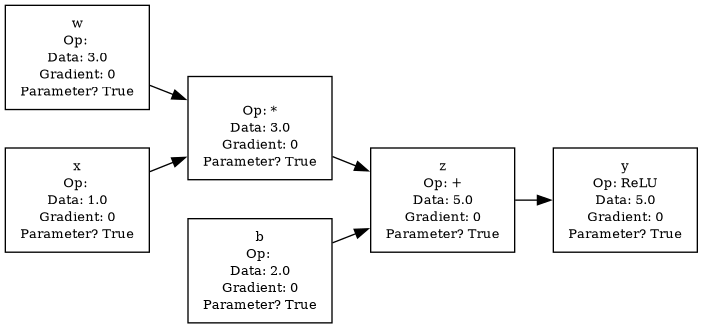

In [ ]:
# Visualize the graph
draw_dag(y)

In [ ]:
# Call the backward method to compute gradients
y.backward()

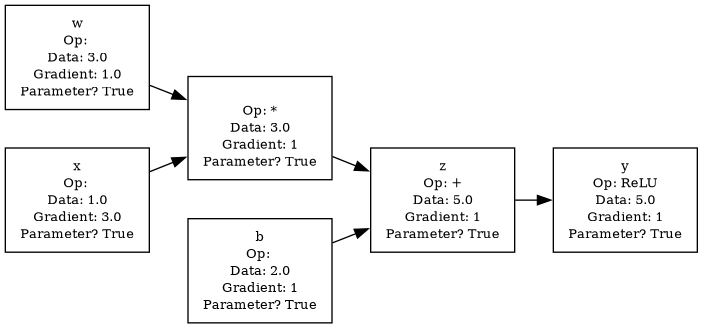

In [ ]:
# Visualize the graph again
draw_dag(y)